In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

2024-04-10 10:51:40.079490: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
loaded_model = load_model("../TumorSense_app/model.h5")
fineMdl = load_model('../TumorSense_app/fine_tuned_model.h5')

2024-04-10 10:51:42.762223: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-10 10:51:42.762256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
index = ['glioma','meningioma','normal','adenoma']

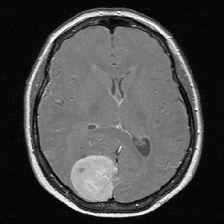

In [4]:
test_image1 = load_img('../testing_dataset_limited/meningioma/Te-me_0010.jpg',target_size = (224,224))
test_image1

In [5]:
test_image1 = img_to_array(test_image1)
print(test_image1)
test_image1 = np.expand_dims(test_image1,axis=0)
result1 = np.argmax(loaded_model.predict(test_image1/255.0),axis=1)
print(index[result1[0]])

[[[5. 5. 5.]
  [5. 5. 5.]
  [5. 5. 5.]
  ...
  [5. 5. 5.]
  [7. 7. 7.]
  [7. 7. 7.]]

 [[5. 5. 5.]
  [5. 5. 5.]
  [5. 5. 5.]
  ...
  [5. 5. 5.]
  [7. 7. 7.]
  [7. 7. 7.]]

 [[5. 5. 5.]
  [5. 5. 5.]
  [5. 5. 5.]
  ...
  [5. 5. 5.]
  [7. 7. 7.]
  [7. 7. 7.]]

 ...

 [[7. 7. 7.]
  [7. 7. 7.]
  [7. 7. 7.]
  ...
  [7. 7. 7.]
  [7. 7. 7.]
  [7. 7. 7.]]

 [[4. 4. 4.]
  [5. 5. 5.]
  [6. 6. 6.]
  ...
  [5. 5. 5.]
  [5. 5. 5.]
  [5. 5. 5.]]

 [[5. 5. 5.]
  [5. 5. 5.]
  [6. 6. 6.]
  ...
  [5. 5. 5.]
  [5. 5. 5.]
  [5. 5. 5.]]]


2024-04-10 10:51:44.662854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 516ms/step
meningioma


In [6]:
def test_model(model):
    test_dataset_dir = '../testing_dataset_limited/'

    test_images = []
    test_labels = []
    
    for class_name in index:
        class_dir = os.path.join(test_dataset_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            test_image = load_img(image_path, target_size=(224, 224))
            test_image = img_to_array(test_image) / 255.0
            test_images.append(test_image)
            test_labels.append(class_name)
    
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)
    
    predictions = model.predict(test_images)
    
    predicted_labels = [index[np.argmax(prediction)] for prediction in predictions]
    
    accuracy = np.mean(predicted_labels == test_labels)
    print(f"Accuracy: {accuracy*100}%")

## Pre fine-tuning

In [7]:
test_model(loaded_model)

1/1 [==============================] - 0s 192ms/step
Accuracy: 75.0%


## After fine-tuning

In [8]:
test_model(fineMdl)

1/1 [==============================] - 0s 127ms/step
Accuracy: 90.0%


2024-04-10 10:51:45.576137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
